In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
import pandas as pd
import assignment2_functions

In [28]:
df = assignment2_functions.file_to_dataframe("credit-data.csv")

In [29]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [30]:
df.isna().any()

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [31]:
summary_stats = df.describe()

In [32]:
numeric_var_range = summary_stats['age']['max'] - summary_stats['age']['min']

In [33]:
numeric_var_range

88.0

(array([3.7780e+03, 8.1600e+03, 1.0945e+04, 1.0092e+04, 5.4280e+03,
        2.1920e+03, 4.1500e+02, 6.0000e+00]),
 array([ 21.,  32.,  43.,  54.,  65.,  76.,  87.,  98., 109.]),
 <a list of 8 Patch objects>)

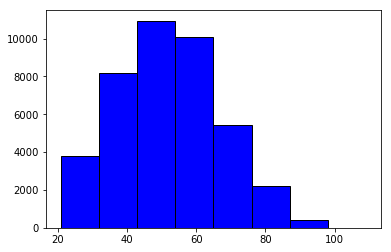

In [34]:
plt.hist(df['age'], color = 'blue', edgecolor = 'black', bins = (numeric_var_range/10).astype('int64'))

In [35]:
df.corr()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,1.000000,-0.622739,0.004499,0.108533,-0.021010,-0.082598,0.006864,0.019755,0.022669,-0.076856,0.004341,-0.065353,-0.030364
SeriousDlqin2yrs,-0.622739,1.000000,-0.004586,-0.173728,-0.045051,0.149334,-0.013502,-0.032810,-0.039898,0.139609,-0.010641,0.121886,0.065708
RevolvingUtilizationOfUnsecuredLines,0.004499,-0.004586,1.000000,-0.008003,0.006009,-0.001999,0.022250,0.005832,-0.014590,-0.001686,0.004763,-0.001413,0.005342
age,0.108533,-0.173728,-0.008003,1.000000,0.005408,-0.068696,0.038828,0.048138,0.159866,-0.069036,0.049168,-0.063622,-0.211002
zipcode,-0.021010,-0.045051,0.006009,0.005408,1.000000,-0.002424,0.002088,-0.004980,-0.009214,-0.001487,0.003141,-0.001198,-0.001744
NumberOfTime30-59DaysPastDueNotWorse,-0.082598,0.149334,-0.001999,-0.068696,-0.002424,1.000000,-0.011620,-0.015224,-0.070704,0.984465,-0.037863,0.988530,-0.007840
DebtRatio,0.006864,-0.013502,0.022250,0.038828,0.002088,-0.011620,1.000000,-0.022988,0.082791,-0.014790,0.177858,-0.013290,-0.070558
MonthlyIncome,0.019755,-0.032810,0.005832,0.048138,-0.004980,-0.015224,-0.022988,1.000000,0.107100,-0.017954,0.127313,-0.015336,0.060528
NumberOfOpenCreditLinesAndLoans,0.022669,-0.039898,-0.014590,0.159866,-0.009214,-0.070704,0.082791,0.107100,1.000000,-0.098176,0.442776,-0.087154,0.060218
NumberOfTimes90DaysLate,-0.076856,0.139609,-0.001686,-0.069036,-0.001487,0.984465,-0.014790,-0.017954,-0.098176,1.000000,-0.054661,0.992143,-0.015737


In [36]:
#number of times 90 days delayed by age

In [38]:
def col_aggregation(df, col_to_group1, col_to_group2):
    '''
    This function takes in a dataframe, a string for a column name to group by,
    and a name for the new index, and returns a summary table of values sorted 
    by percent.
    '''
    summary_table = df.groupby([col_to_group1, col_to_group2]).size().reset_index(name='count')
    summary_table['percent'] = summary_table['count']/len(df)
    
    return summary_table.sort_values(by='percent', ascending=False)

In [39]:
col_aggregation(df, 'NumberOfTimes90DaysLate', 'age')

,NumberOfTimes90DaysLate,age,count,percent
26,0,47,996,0.024283
28,0,49,960,0.023406
29,0,50,946,0.023064
24,0,45,929,0.022650
30,0,51,923,0.022503
41,0,62,921,0.022455
33,0,54,914,0.022284
35,0,56,912,0.022235
31,0,52,912,0.022235
32,0,53,909,0.022162
